Cargando datos en Pandas
========================

Objetivo
--------
*La finalidad de este capítulo es mostrar como cargar datos desde un archivo tipo csv, pero **Pandas** soporta más tipo de archivos. Debido a que el módulo tiene estructudas de datos que facilitan la manipulación de los datos al leerse desde un archivo, entonces explico un poco sobre el módulo Numpy y las Series y DataFrame que son estruturas de datos en Pandas.*

Algunas comparaciones con R
---------------------------
La primera tarea que yo analizar datos es evidentemente *cargar* los datos que proviene de alguna fuente( base de datos) o archivo. Considerando la semejanza de **Pandas** con el uso de **R**, para mi las primeras tareas después de cargar los datos es revisar propiedades como tamaño o *dim()*, leer los primeros o los últimos registros *head()* o *tail()*, explorar el tipo de variables que tienen la muestra de datos *struct()* o explorar la existencia de registros nulos o **NA**, ver el resumen de los estadísticos básicos de las variables. Desde mi punto de vista, conociendo esa primera información uno puede iniciar un análisis exploratorio mucho más robusto.

El módulo **Pandas** tiene estructuras de datos para procesar la información con nombre similar a las de **R**, son los **DataFrame**. Las librerías de R que permiten operar los datos del mismo modo que Pandas son ddply y reshape2, el resto de operaciones para manipular DataFrame tienen un equivalente en las dos tecnologías.


Algunas cosas previas a cargar datos.
------------------------------------

Debido a que al cargar los datos desde alguna archivo o fuente, ya sea en formato csv, excel, xml, json o desde algúna base Mysql, etc. Serán cargados en Ipython como Data.Frame o Series, pero estas estructuras en **Pandas** tienen como base el manejo de **matrices** con **Numpy**. Por eso comento algunas cosas sobre Numpy.

En resumen, creo que es bueno antes de cargar datos, saber algo sobre las estructuras de datos en Pandas y a su vez creo importante saber un poco sobre lo que permite la creación de las estructuras en Pandas, que es el módulo Numpy.

**Numpy**


En breve, este módulo permite el tratamiento de matrices y arrays, cuenta con funciones estándar de matemáticas, algunas funciones estadísticas básicas, permite la generación de números aleatorios, operaciones de álgebra lineal y análisis de Fourier, entre otras operaciones y funciones.


Siempre los ejemplos que se hacen de Numpy explican cosas como: la contrucción de matrices y arrays, operaciones entre matrices y arrays, como usar la *vectorización* de las matrices, selección de filas y columnas, copia y eliminación de entradas, etc. En mi caso pienso que aprendo mejor con ejemplos de como usar algunas de las funciones o herramientas del módulo, que solo leyendo las teoria y operaciones. Entonces comparto 3 ejemplos sencillos de cómo usar Numpy para 3 tipos de problemas, uno tiene caracter de análisis numérico, calculos de una cadena de markov y el últmo es una aplicación de las cadenas de Markov (el algoritmo PageRank de manera rupestre).

**Regiones de Estabilidad Absoluta calculados con Numpy**

**Problema del laberito con Numpy**

**Ejemplo de PageRank de manera rupestre, calcuado con Numpy**

\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}



Data.Frame y Series
===================

Los dos elementos principales de **Pandas** son Data.Frame y Series. El nombre Data.Frame es igual que el que se usa en R project y en escencia tiene la misma finalidad de uso, para la carga y procesamiento de datos.

Los siguientes ejemplos son breves, para conocer con detalle las propiedades, operaciones y caracteristicas que tienen estos dos objetos se puede consultar el libro [Python for Data Analysis](https://www.amazon.com) o el sitio oficial del módulo [Pandas](https://www.pandas.pydata.org). 

Primero se carga el módulo y los objetos y se muestran como usarlos de manera sencilla.

In [2]:
#Se carga el módulo
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#Se construye una Serie, se agregan primero la lista de datos y después la lista de índices
datos_series=Series([1,2,3,4,5,6],index=['a','b','c','d','e','f'])

In [3]:
#Se muestra como carga los datos Pandas en la estrutura definida
datos_series

a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

In [4]:
#Se visualizan los valores que se guardan en la estructura de datos
datos_series.values

array([1, 2, 3, 4, 5, 6])

In [5]:
#Se visualizan los valores registrados como índices
datos_series.index

Index([u'a', u'b', u'c', u'd', u'e', u'f'], dtype='object')

In [6]:
#Se seleccionan algún valor asociado al índice 'b'
datos_series['b']

2

In [7]:
#Se revisa si tienen datos nulos o NaN
datos_series.isnull()

a    False
b    False
c    False
d    False
e    False
f    False
dtype: bool

In [8]:
#Se calcula la suma acumulada, es decir 1+2,1+2+3,1+2+3+4,1+2+3+4+5,1+2+3+4+5+6
datos_series.cumsum()

a     1
b     3
c     6
d    10
e    15
f    21
dtype: int64

In [9]:
#Se define un DataFrame, primero se define un diccionario y luego de genera el DataFrame
datos={'Estado':['Guanajuato','Querétaro','Jalisco','Durango','Colima'],'Población':[5486000,1828000,7351000,1633000,723455],'superficie':[30607,11699,78588,123317,5627]}
Datos_Estados=DataFrame(datos)       

In [10]:
Datos_Estados

,Estado,Población,superficie
0,Guanajuato,5486000,30607
1,Querétaro,1828000,11699
2,Jalisco,7351000,78588
3,Durango,1633000,123317
4,Colima,723455,5627


In [11]:
#Se genrea de nuevo el DataFrame y lo que se hace es asignarle índice para manipular los datos
Datos_Estados=DataFrame(datos,index=[1,2,3,4,5])

In [12]:
Datos_Estados

,Estado,Población,superficie
1,Guanajuato,5486000,30607
2,Querétaro,1828000,11699
3,Jalisco,7351000,78588
4,Durango,1633000,123317
5,Colima,723455,5627


In [13]:
#Se selecciona una columna
Datos_Estados.Estado

1    Guanajuato
2     Querétaro
3       Jalisco
4       Durango
5        Colima
Name: Estado, dtype: object

In [14]:
#Otro modo de elegir la columna es del siguiente modo.
Datos_Estados['Estado']

1    Guanajuato
2     Querétaro
3       Jalisco
4       Durango
5        Colima
Name: Estado, dtype: object

In [15]:
#Se elige una fila, y se hace uso del índice que se definió para los datos
Datos_Estados.ix[2]

Estado        Querétaro
Población       1828000
superficie        11699
Name: 2, dtype: object

In [16]:
#Se selecciona más de una fila
Datos_Estados.ix[[3,4]]

,Estado,Población,superficie
3,Jalisco,7351000,78588
4,Durango,1633000,123317


In [17]:
#Descripción estadística en general, la media, la desviación estándar, el máximo, mínimo, etc.
Datos_Estados.describe()

,Población,superficie
count,5.000000e+00,5.000000
mean,3.404291e+06,49967.600000
std,2.860029e+06,50011.671546
min,7.234550e+05,5627.000000
25%,1.633000e+06,11699.000000
50%,1.828000e+06,30607.000000
75%,5.486000e+06,78588.000000
max,7.351000e+06,123317.000000


In [18]:
#Se modifica el DataFrame , se agrega una nueva columna 
from numpy import nan as NA
Datos_Estados['Índice']=[1.0,4.0,NA,4.0,NA]

In [19]:
Datos_Estados

,Estado,Población,superficie,Índice
1,Guanajuato,5486000,30607,1.0
2,Querétaro,1828000,11699,4.0
3,Jalisco,7351000,78588,NaN
4,Durango,1633000,123317,4.0
5,Colima,723455,5627,NaN


In [20]:
#Se revisa si hay datos NaN o nulos
Datos_Estados.isnull()

,Estado,Población,superficie,Índice
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,True


In [21]:
#Pandas cuenta con herramientas para tratar los Missing Values, en esto se pueden explorar como con isnull() o 
#eliminar con dropna. En este caso de llena con fillna
Datos_Estados.fillna(0)

,Estado,Población,superficie,Índice
1,Guanajuato,5486000,30607,1.0
2,Querétaro,1828000,11699,4.0
3,Jalisco,7351000,78588,0.0
4,Durango,1633000,123317,4.0
5,Colima,723455,5627,0.0


Los ejemplos anteriores muestras que es muy sencillo manipular los datos con Pandas, ya sea con Series o con DataFrame. Para mayor detalle de las funciones lo recomendable es consultar las referencias mencionadas anteriormente.

Cargar datos desde diversos archivos y estadísticas sencillas.
--------------------------------------------------------------

In [2]:
#Se agraga a la consola de ipython la salida de matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(30,8)

In [3]:
#Se cargan los datos desde un directorio, se toma como headers los registros de la fila 0
datos=pd.read_csv('~/Datos/Mujeres_ingeniería_y_tecnología.csv')

In [4]:
#Se visualizan los primeros 10 registros
datos.head(10)

,ENTIDAD,CICLO,MUJERES_INSC_ING,MAT_TOTAL_SUP,%_MUJERES_EN_ING
0,01 Aguascalientes,2010/2011,3842,35198,10.915393
1,02 Baja California,2010/2011,6614,78503,8.425156
2,03 Baja California Sur,2010/2011,1217,15503,7.850094
3,04 Campeche,2010/2011,2262,23275,9.718582
4,05 Coahuila,2010/2011,8776,74490,11.781447
5,06 Colima,2010/2011,1053,19367,5.437084
6,07 Chiapas,2010/2011,6093,81114,7.511650
7,08 Chihuahua,2010/2011,10923,93963,11.624788
8,09 Distrito Federal,2010/2011,49797,472104,10.547888
9,10 Durango,2010/2011,3865,34099,11.334643


In [7]:
#Se observa la forma de los datos o las dimensiones, se observa que son 160 filas y 5 columnas.
datos.shape

(160, 5)

In [8]:
#Se da una descripción del tipo de variables que se cargan en el dataFrame
datos.dtypes

ENTIDAD              object
CICLO                object
MUJERES_INSC_ING      int64
MAT_TOTAL_SUP         int64
%_MUJERES_EN_ING    float64
dtype: object

In [9]:
#Se puede visualizar las información de las colunnas de manera más completa
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
ENTIDAD             160 non-null object
CICLO               160 non-null object
MUJERES_INSC_ING    160 non-null int64
MAT_TOTAL_SUP       160 non-null int64
%_MUJERES_EN_ING    160 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.3+ KB


In [10]:
#Se hace un resumen estadístico global de las variables o columnas
datos.describe()

,MUJERES_INSC_ING,MAT_TOTAL_SUP,%_MUJERES_EN_ING
count,160.000000,160.000000,160.000000
mean,7902.006250,102825.350000,7.751666
std,7889.680464,104905.660695,2.259843
min,770.000000,15503.000000,3.665607
25%,3158.500000,40868.000000,5.930021
50%,5952.500000,71109.500000,7.579092
75%,9071.750000,101274.500000,9.364771
max,49797.000000,581222.000000,12.891235


Viendo los datos que se tienen, es natural preguntarse algo al respecto. Lo sencillo es, *¿cuál es el estado que presenta mayor cantidad de inscripciones de mujeres a ingeniería?*, pero también se puede agregar a la pregunta anterior el preguntar en qué año o cíclo ocurrió eso.

Algo sencillo para abordar las anteriores preguntas construir una tabla que permita visualizar la relación entre las variables mencionadas.

In [26]:
#Se construye una tabla pivot para ordenar los datos y conocer como se comportó el total de mujeres 
#inscritas a ingenierías
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING')

CICLO,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015
ENTIDAD,,,,,
01 Aguascalientes,3842,2537,2892,3183,3677
02 Baja California,6614,5745,6244,6470,6830
03 Baja California Sur,1217,770,886,967,1083
04 Campeche,2262,2028,2111,2217,2310
05 Coahuila,8776,7119,7423,8044,8879
06 Colima,1053,827,977,1110,1266
07 Chiapas,6093,5046,5178,5181,4953
08 Chihuahua,10923,8575,8950,9038,9628
09 Distrito Federal,49797,31873,34382,36508,39301


In [30]:
#Se revisa cual son los 3 estados con mayor cantidad de inscripciones en el cíclo 2012/2013
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING').sort_values(by='2012/2013')[-3:]

CICLO,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015
ENTIDAD,,,,,
30 Veracruz,23159,19601,20676,22485,24686
15 Mï¿½xico,27042,22470,23887,25379,27150
09 Distrito Federal,49797,31873,34382,36508,39301


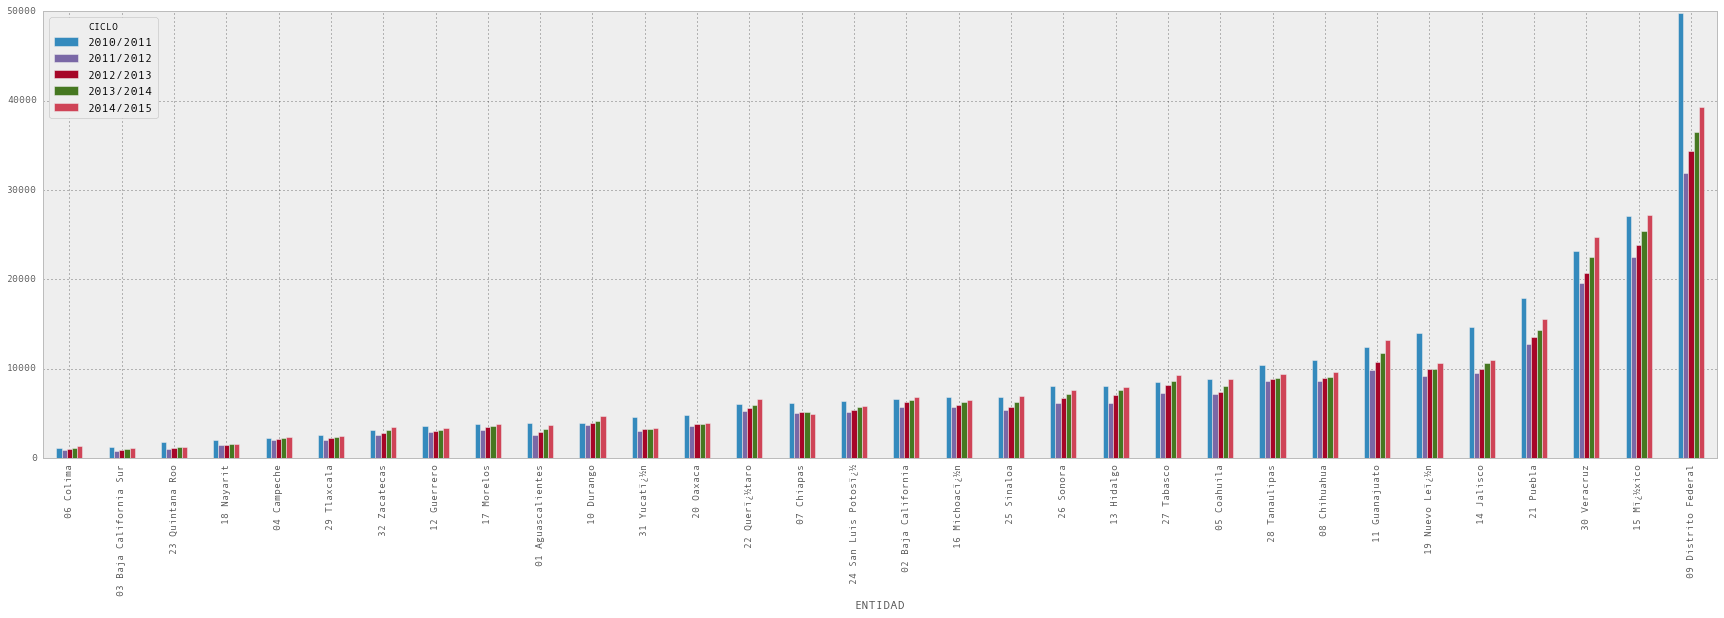

In [33]:
#Se grafican los resultados de la tabla anterior, pero ordenadas por el cíclo 2010/2011
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING').sort_values(by='2010/2011').plot(kind='bar')

**Observación**: se vuelve evidente que las entidades federales o Estados donde se inscriben más mujeres a ingenierías son el Distrito Federal(Ciudad de México), Estado de México, Veracruz, Puebla, Guanajuato, Jalisco y Nuevo León. También se observa que en todos los estados en el periódo 2010/2011 la cantidad de mujeres que se inscribieron fue mayor y decayó significativamente en los años siguientes.

Esto responde a la pregunta : *¿cuál es el estado que presenta mayor cantidad de inscripciones de mujeres a ingeniería?*

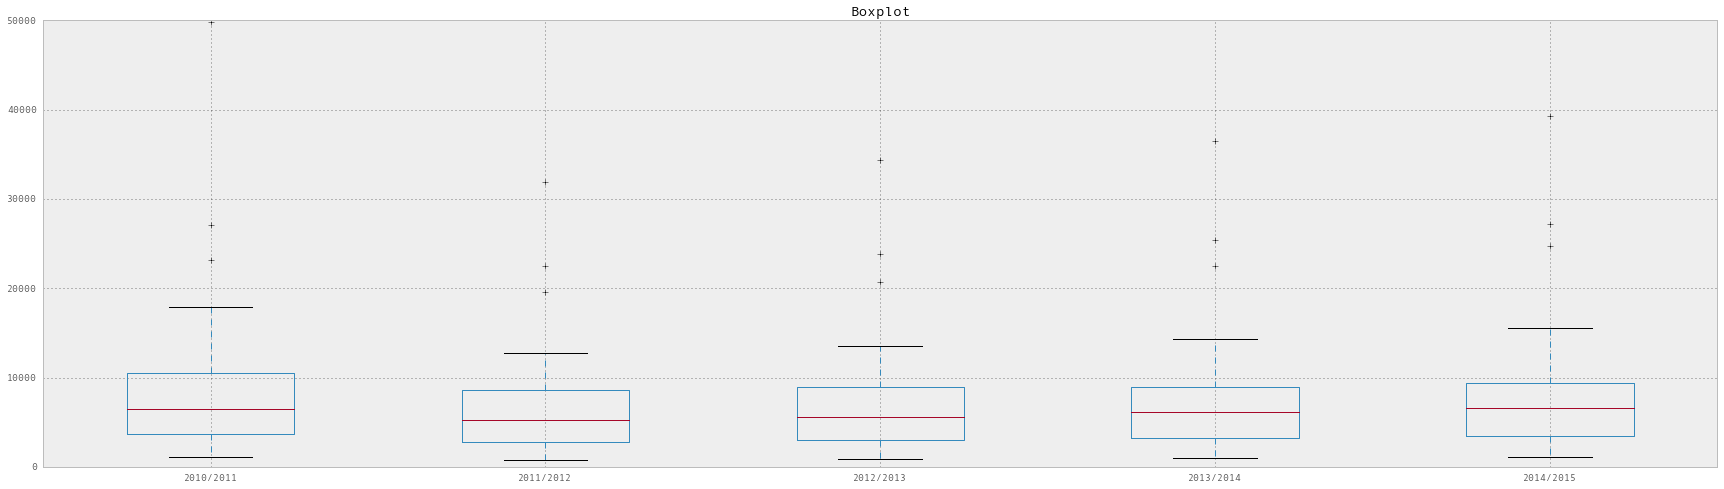

In [13]:
#Se grafica el boxplot para cada periodo 
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING').plot(kind='box', title='Boxplot')

**Nota**: para estre breve análisis se hace uso de la construcción de tablas pivot en pandas. Esto facilidad analizar como se comportan las variables categóricas de los datos. En este ejemplo se muestra que el periódo 2010/2011 tuvo una media mayor de mujeres inscritas en ingeniarías, pero también se ve que la relación entre los estados fue más dispersa. Pero también se ve que los periódos del 2011/2012, 2012/2013 y 2013/2014 tienen comportamientos "similares".

Otras herramientas gráficas
---------------------------

Conforme evolucionó **Pandas** y el módulo se volvió más usado, la límitante que tenía a mi parecer, era el nivel de gráficos base. Para usar los DataFrame y Series en matplotlib se necesita definir los array o procesarlos de modo tal que puedan contruirse mejores gráficos. Matplotlib es un módulo muy potente, pero resulta mucho más engorroso hacer un análisis grafico. Si se ha usado R project para hacer una exploración de datos, resulta muy facil constrir los gráficos básicos y con librerías como **ggplot2** o **lattice** se puede hacer un análisis gráfico sencillo y potente.

Ante este problema se diseño una librería para complementar el análisis grafico, que es algo asi como "de alto nivel" al comprarla con matplotlib. El módulo se llama **seaborn**. 

Para los siguientes ejemplos uso los datos que se han analizado anteriormente.

In [14]:
#Se construye la tabla 
#Tabla1=datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING')
datos.head()

,ENTIDAD,CICLO,MUJERES_INSC_ING,MAT_TOTAL_SUP,%_MUJERES_EN_ING
0,01 Aguascalientes,2010/2011,3842,35198,10.915393
1,02 Baja California,2010/2011,6614,78503,8.425156
2,03 Baja California Sur,2010/2011,1217,15503,7.850094
3,04 Campeche,2010/2011,2262,23275,9.718582
4,05 Coahuila,2010/2011,8776,74490,11.781447


In [5]:
#Se carga la librería seaborn
import seaborn as sns
#sns.set(style="ticks")
#sns.boxplot(x="CICLO",y="MUJERES_INSC_ING",data=datos,palette="PRGn",hue="CICLO")

**Como cargar un json y analizarlo.**

En la siguiente se da una ejemplo de como cargar datos desde algún servicio web que regresa un arvhivo de tipo JSON. 

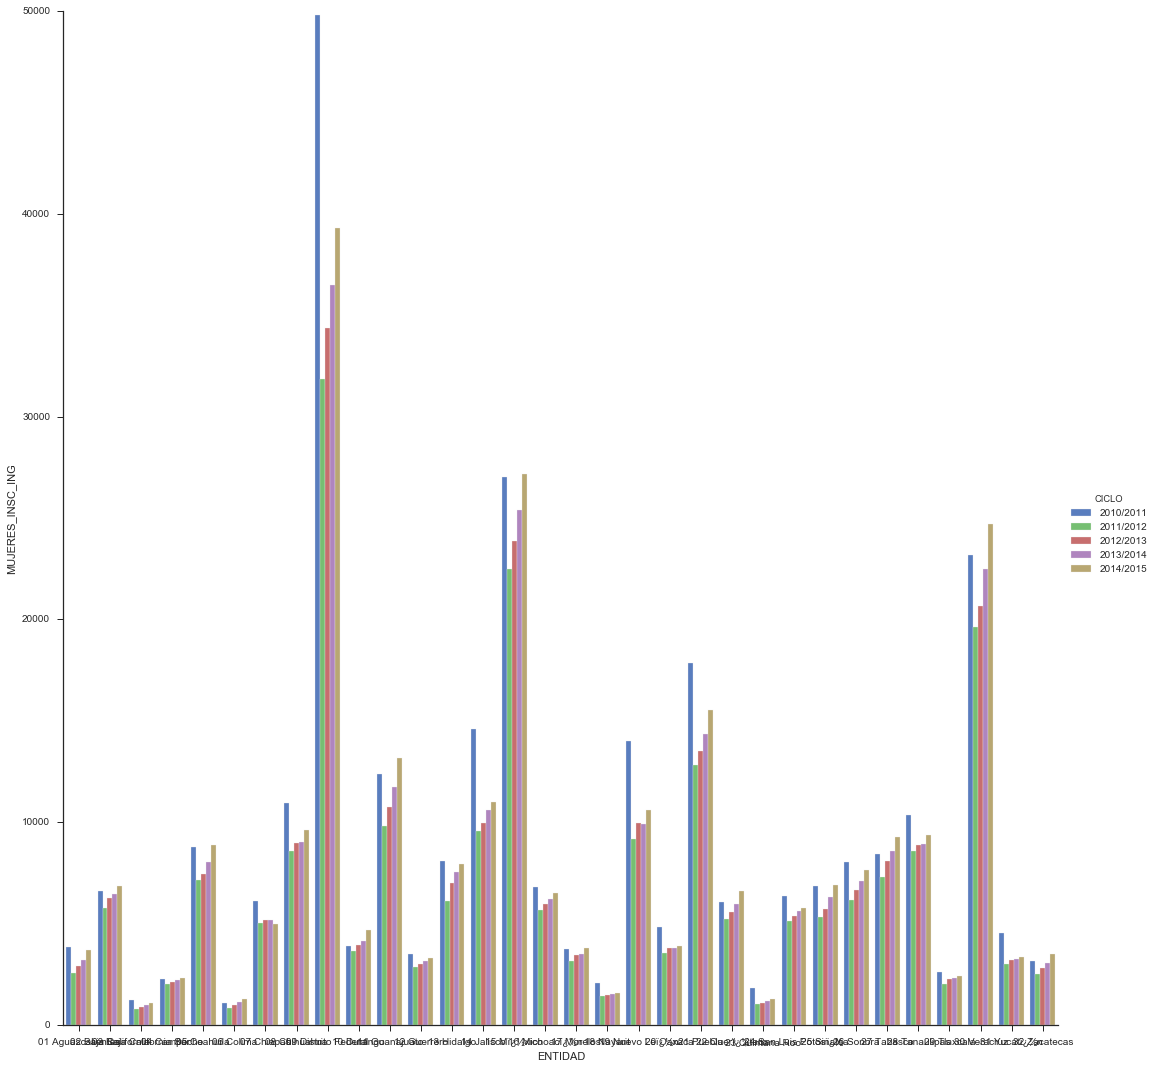

In [31]:
sns.factorplot(x="ENTIDAD",y="MUJERES_INSC_ING",hue="CICLO",data=datos,palette="muted", size=15,kind="bar")


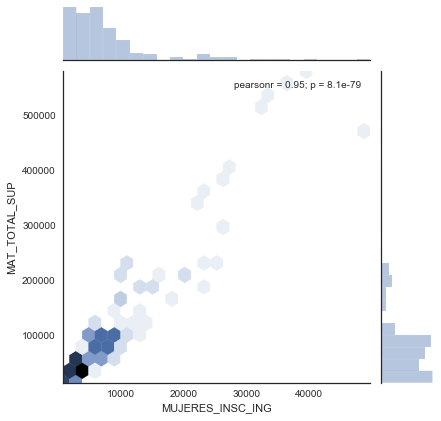

In [15]:
#Otra gráfica, se muestra el cruce entre las mujeres  que se inscriben en ingeniería y el total de mujeres
with sns.axes_style('white'):
    sns.jointplot('MUJERES_INSC_ING','MAT_TOTAL_SUP',data=datos,kind='hex')

Conclusión: 
-----------

Se observa que es facil el cargar datos desde un archivo, es lo usual, dar la ruta y el tipo de archivo se carga con la función correspondiente a ese tipo de archivo. También, con **Pandas** resulta sencillo hacer una tabla pivot, lo cual ayuda a organizar o explorar los datos y la relación entre al menos dos variables. 